In [27]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve

In [5]:
data = pd.read_csv('voice.csv')

In [8]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [11]:
X = data.drop('label' ,axis=1)
Y = data['label']

In [13]:
le = LabelEncoder()
y_encoded = le.fit_transform(Y)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled , columns=X.columns)

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y_encoded , test_size=0.3 , random_state=42 , stratify=y_encoded)

In [21]:
model = LogisticRegression(random_state=42)
model.fit(X_train , y_train)

/Users/erenaktasci/Desktop/calısma/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/erenaktasci/Desktop/calısma/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/erenaktasci/Desktop/calısma/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/erenaktasci/Desktop/calısma/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/erenaktasci/Desktop/calısma/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in 

LogisticRegression(random_state=42)

In [32]:
y_pred_proba = model.predict_proba(X_test)[: ,1]

/Users/erenaktasci/Desktop/calısma/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/erenaktasci/Desktop/calısma/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/erenaktasci/Desktop/calısma/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [24]:
fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba)

In [25]:
roc_auc = roc_auc_score(y_test , y_pred_proba)

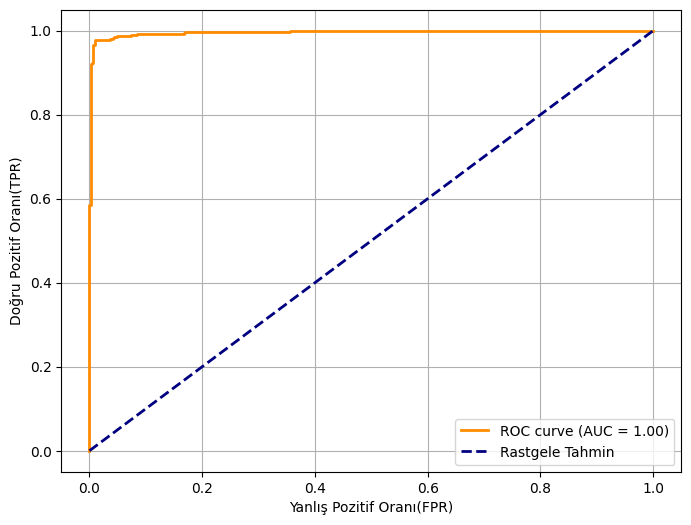

In [35]:
plt.figure(figsize=(8,6))
plt.plot(fpr , tpr , color='darkorange' , lw=2 , label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1] , [0,1] , color = 'navy' , lw=2 , linestyle='--' , label = 'Rastgele Tahmin')
plt.xlabel('Yanlış Pozitif Oranı(FPR)')
plt.ylabel('Doğru Pozitif Oranı(TPR)')
plt.legend(loc = 'lower right')
plt.grid(True)
